In [68]:
#Importation des modules
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt  
import seaborn as sns            
import missingno as mn           
from scipy import stats          
from sklearn.model_selection import train_test_split
import category_encoders as ce
from scipy.stats import norm, skew, kurtosis 

from IPython.core.display import HTML

''' Génératin de graphiques'''
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls


from IPython.display import display
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
# py.init_notebook_mode(connected=True)

In [16]:
def load_data(data_path=r'/home/pierre/dev/ENSAE/S1/Infrastructure/horse-racing-prediction/dataset'):
    csv_path = os.path.join(data_path, "export-1-pt-utf.csv")
    return pd.read_csv(csv_path)

In [17]:
df = load_data()
df.head()

,place,placeoptin,rapport,cr-reunion,cr-num,cr-nb_partants,cr-Hippodrome,cr-Evt,cr-Date,cr-autostart,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
0,0,2,0.0,1,1,17,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.3877,0.3136,0.3010,0.2500,1.0000,0.8943
1,0,8,0.0,1,4,15,Vincennes,1,01-01-2011,0,...,0.0,0.0,0.0,0.0,0.5870,0.2651,0.5870,0.7142,1.0000,0.8717
2,1,1,2.4,1,6,13,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.6358,0.7295,0.6358,0.5001,0.9697,0.0000
3,1,1,1.4,1,9,7,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.0000,0.0096,0.0000,1.0000,1.0000,0.1892
4,0,8,0.0,1,2,15,Vincennes,0,02-01-2011,0,...,1.0,1.0,1.0,0.0,0.8642,0.8798,0.8642,0.0000,0.9211,0.8555


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19869 entries, 0 to 19868
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   place                             19869 non-null  int64  
 1   placeoptin                        19869 non-null  int64  
 2   rapport                           19869 non-null  float64
 3   cr-reunion                        19869 non-null  int64  
 4   cr-num                            19869 non-null  int64  
 5   cr-nb_partants                    19869 non-null  int64  
 6   cr-Hippodrome                     19869 non-null  object 
 7   cr-Evt                            19869 non-null  int64  
 8   cr-Date                           19869 non-null  object 
 9   cr-autostart                      19869 non-null  int64  
 10  cr-corde                          19869 non-null  object 
 11  cr-etat du terrain                19869 non-null  object 
 12  cr-d

In [29]:
'''Chargement du fichier csv
Ce reporter au notebook précédent concernant le type des variables

'''

column_types = {
    "place" : "int64",
"placeoptin" : "int64",
"rapport" : "float32",
"cr-reunion" : "int64",
"cr-num" : "int64",
"cr-nb_partants" : "int64",
"cr-Hippodrome" : "object",
"cr-Evt" : "int64",
"cr-autostart" : "int64",
"cr-corde" : "object",
"cr-etat du terrain" : "object",
"cr-distance" : "object",
"Numcheval" : "int64",
"CoteProbable" : "int64",
"Sexe" : "object",
"NbRencontre" : "float32",
"NbBattus" : "float32",
"SommeNbRencontre" : "float32",
"SommeNbBattus" : "float32",
"NumCourseJockey" : "float32",
"QteCourseJockeyJour" : "float32",
"SumCote5Race" : "float32",
"MoyenneCote5Race" : "float32",
"qteCoteCheval" : "float32",
"ETCote5Race" : "float32",
"SumPoids" : "int64",
"SumIdJockey" : "float32",
"SumidHippodrome" : "float32",
"SumIdDeferre" : "float32",
"SumDistance" : "float32",
"SumAllocation" : "float32",
"PositionIdJockey" : "float32",
"PositionidHippodrome" : "float32",
"PositionIdDeferre" : "float32",
"PositionDistance" : "float32",
"PositionAllocation" : "float32",
"pourcentIdJockey" : "float32",
"pourcentidHippodrome" : "float32",
"pourcentIdDeferre" : "float32",
"pourcentDistance" : "float32",
"pourcentAllocation" : "float32",
"SommeCourse" : "float32",
"nbjourdercourse" : "float32",
"numeroagespec" : "float32",
"numerodistancespec" : "float32",
"numerodeferrespec" : "float32",
"numerosexespec" : "float32",
"numeroagesexedistancespec" : "float32",
"idjockeynumcoursenbrcoursespec" : "float32",
"jockeyReussite" : "float32",
"jockeyReussitePlusPlace" : "float32",
"jockeyReussiteSpecialite" : "float32",
"jockeynReussiteDistance" : "float32",
"jockeyReussiteIdcheval" : "float32",
"jockeyReussiteDeferre" : "float32",
"jockeynReussiteSpecialiteDeferre" : "float32",
"jockeyReussiteDistanceDeferre" : "float32",
"entraineurReussite" : "float32",
"entraineurReussitePlusPlace" : "float32",
"entraineurReussiteSpecialite" : "float32",
"entraineurnReussiteDistance" : "float32",
"entraineurReussiteIdcheval" : "float32",
"chevalReussite" : "float32",
"chevalReussitePlusPlace" : "float32",
"chevalReussiteSpecialite" : "float32",
"chevalnReussiteDistance" : "float32",
"coteprobable" : "float32",
"gains" : "float32"
}

courses = pd.read_csv('/home/pierre/dev/ENSAE/S1/Infrastructure/horse-racing-prediction/dataset/export-1-pt-utf.csv',dtype=column_types,parse_dates=['cr-Date'],infer_datetime_format=True,sep=",")

#courses= pd.read_csv('../input/export-1-pt-utf.csv')
courses = courses.drop(columns=['placeoptin','rapport'])

''' On divise notre jeu de données en deux parties'''
train, test = train_test_split(courses, test_size=0.33, random_state=42)



display(train.head(2))

test = courses.drop(columns=['place'])
display(test.head(2))

/tmp/ipykernel_2798/2818718369.py:77: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  courses = pd.read_csv('/home/pierre/dev/ENSAE/S1/Infrastructure/horse-racing-prediction/dataset/export-1-pt-utf.csv',dtype=column_types,parse_dates=['cr-Date'],infer_datetime_format=True,sep=",")


,place,cr-reunion,cr-num,cr-nb_partants,cr-Hippodrome,cr-Evt,cr-Date,cr-autostart,cr-corde,cr-etat du terrain,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
15565,1,3,4,10,Toulouse,0,12-01-2015,1,corde à droite,terrain bon,...,1.0000,0.0000,1.00,0.0000,0.0000,0.0000,0.0000,1.0,0.0,0.6308
8689,1,1,9,16,Argentan,0,17-07-2013,0,corde à droite,terrain bon,...,0.9084,0.3155,0.75,0.3333,0.1217,0.2314,0.0453,1.0,0.8,0.0000


,cr-reunion,cr-num,cr-nb_partants,cr-Hippodrome,cr-Evt,cr-Date,cr-autostart,cr-corde,cr-etat du terrain,cr-distance,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
0,1,1,17,Vincennes,0,01-01-2011,1,corde à gauche,terrain bon,2.100 mètres,...,0.0,0.0,0.0,0.0,0.3877,0.3136,0.301,0.2500,1.0,0.8943
1,1,4,15,Vincennes,1,01-01-2011,0,corde à gauche,terrain bon,2.850 mètres,...,0.0,0.0,0.0,0.0,0.5870,0.2651,0.587,0.7142,1.0,0.8717


In [53]:
''' #1.Fonction d'affichage de barres en échelle absolue.'''
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Fréquence absolue', fontsize = font_size)
    plt.xticks(rotation = 45, fontsize = font_size)
    plt.yticks([])
    
    # Set individual bar labels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
    
'''#2.Fonction d'affichage de barres à l'échelle relative.'''
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Fréquence relative (%)', fontsize = font_size)
    plt.xticks(rotation = 45, fontsize = font_size)
    plt.yticks([]) 
    
    # Etiquette personnalisée
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
         
'''#3.Fonction pour créer un DataFrame avec les valeurs absolue et relative. Affiche le graphe correspondant.'''
def freq_absolue_et_relative(variable, horizontal=False, ):
    global  ax, ax1 
    # Création du DataFrame
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    # On multiplie par 100 et on arronde à 2 décimales
    df = pd.DataFrame({'Fréquence absolue':absolute_frequency, 'Fréquence relative(%)':relative_frequency})
    print('Fréquence absolue et relative de ',variable.name,':')
    display(df)
    
    # Génération du graph.
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    if horizontal:
        ax =  absolute_frequency.plot.barh(title = 'Fréquence absolue de %s' %variable.name, figsize = fig_size)
    else:
        ax =  absolute_frequency.plot.bar(title = 'Fréquence absolue de %s' %variable.name, figsize = fig_size)
    ax.title.set_size(title_size)
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    
    if horizontal:
        ax1 = relative_frequency.plot.barh(title = 'Fréquence relative de %s' %variable.name, figsize = fig_size)
    else:
        ax1 = relative_frequency.plot.bar(title = 'Fréquence relative de %s' %variable.name, figsize = fig_size)

    ax1.title.set_size(title_size)
    pct_bar_labels() # Affiche les étiquettes.
    plt.show()


In [31]:
'''Type des données de nos variables.'''
'**Type des données de nos variables:**'
# On parcours les différentes colonnes
listeInt=""
listeFloat=""
listeObj=""
for col in courses.columns:
    if courses[col].dtype in ['float32', 'float64']:
        listeFloat+=col+','
    if courses[col].dtype in [ 'int32','int64']:
        listeInt +=col+","
    if courses[col].dtype in ['object']:
        listeObj+=col+','

display("Type flottant : "+listeFloat)
display("Type Int : "+listeInt)
display("Type Objet : "+listeObj)
display("Type Date : cr-Date")

'Type flottant : NbRencontre,NbBattus,SommeNbRencontre,SommeNbBattus,NumCourseJockey,QteCourseJockeyJour,SumCote5Race,MoyenneCote5Race,qteCoteCheval,ETCote5Race,SumIdJockey,SumidHippodrome,SumIdDeferre,SumDistance,SumAllocation,PositionIdJockey,PositionidHippodrome,PositionIdDeferre,PositionDistance,PositionAllocation,pourcentIdJockey,pourcentidHippodrome,pourcentIdDeferre,pourcentDistance,pourcentAllocation,SommeCourse,nbjourdercourse,numeroagespec,numerodistancespec,numerodeferrespec,numerosexespec,numeroagesexedistancespec,idjockeynumcoursenbrcoursespec,jockeyReussite,jockeyReussitePlusPlace,jockeyReussiteSpecialite,jockeynReussiteDistance,jockeyReussiteIdcheval,jockeyReussiteDeferre,jockeynReussiteSpecialiteDeferre,jockeyReussiteDistanceDeferre,entraineurReussite,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains,'

'Type Int : place,cr-reunion,cr-num,cr-nb_partants,cr-Evt,cr-autostart,Numcheval,CoteProbable,SumPoids,'

'Type Objet : cr-Hippodrome,cr-Date,cr-corde,cr-etat du terrain,cr-distance,Sexe,'

'Type Date : cr-Date'

Fréquence absolue et relative de  place :


,Fréquence absolue,Fréquence relative(%)
place,,
1,11005,55.39
0,8864,44.61


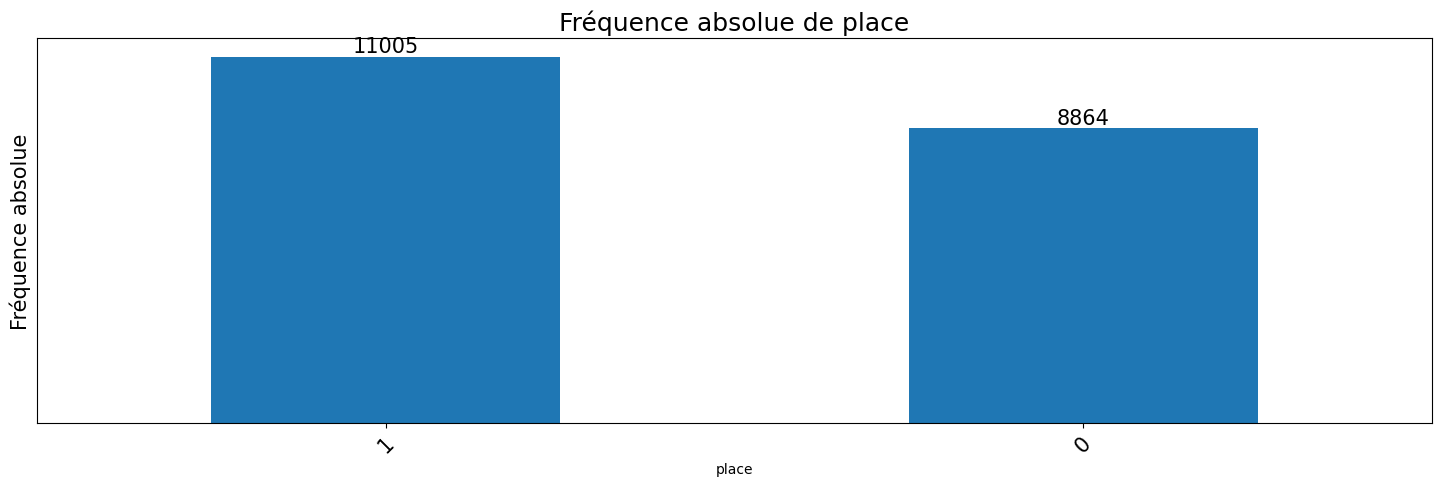

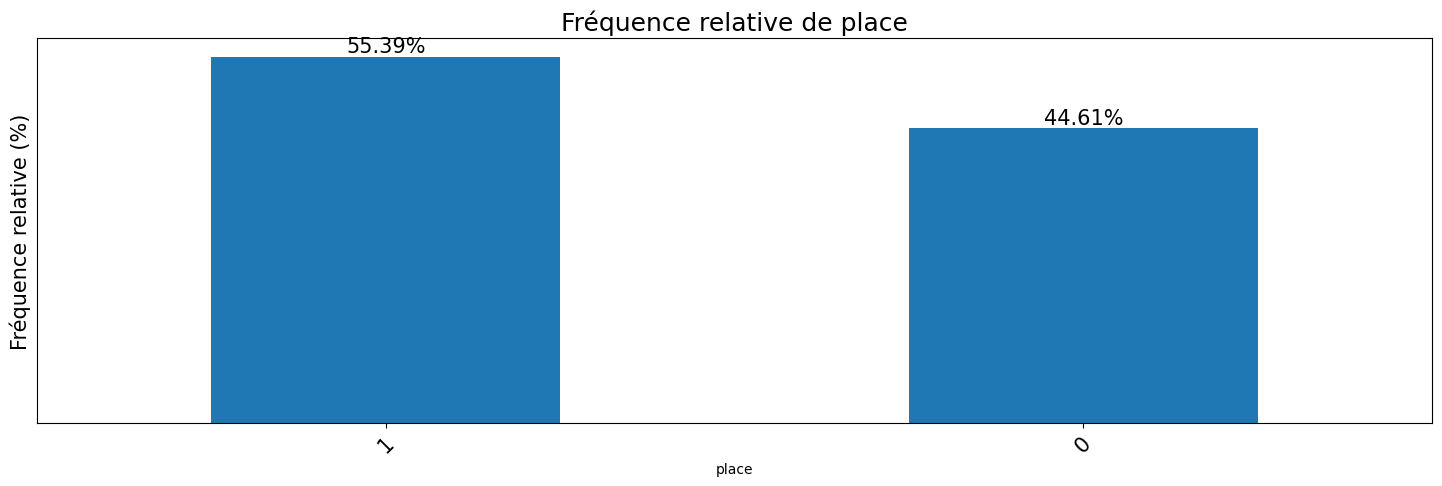

In [54]:
'''Tracez et comptez le nombre de gagnants à l'échelle absolue et relative.'''
freq_absolue_et_relative(courses["place"])

Fréquence absolue et relative de  Sexe :


,Fréquence absolue,Fréquence relative(%)
Sexe,,
H,7476,37.63
F,6693,33.69
M,5700,28.69


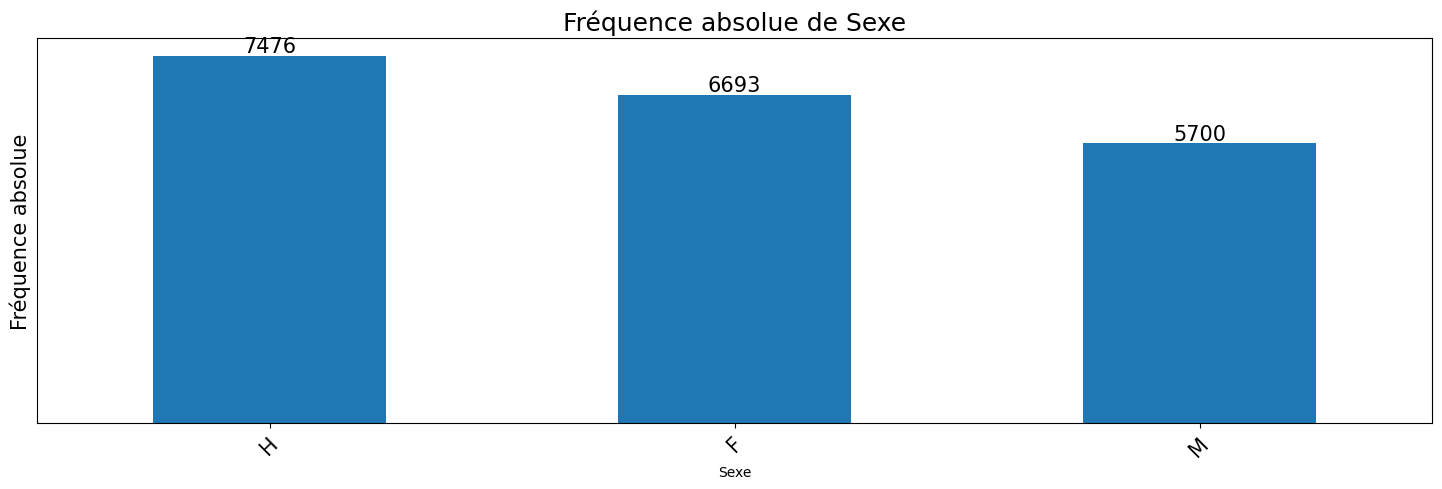

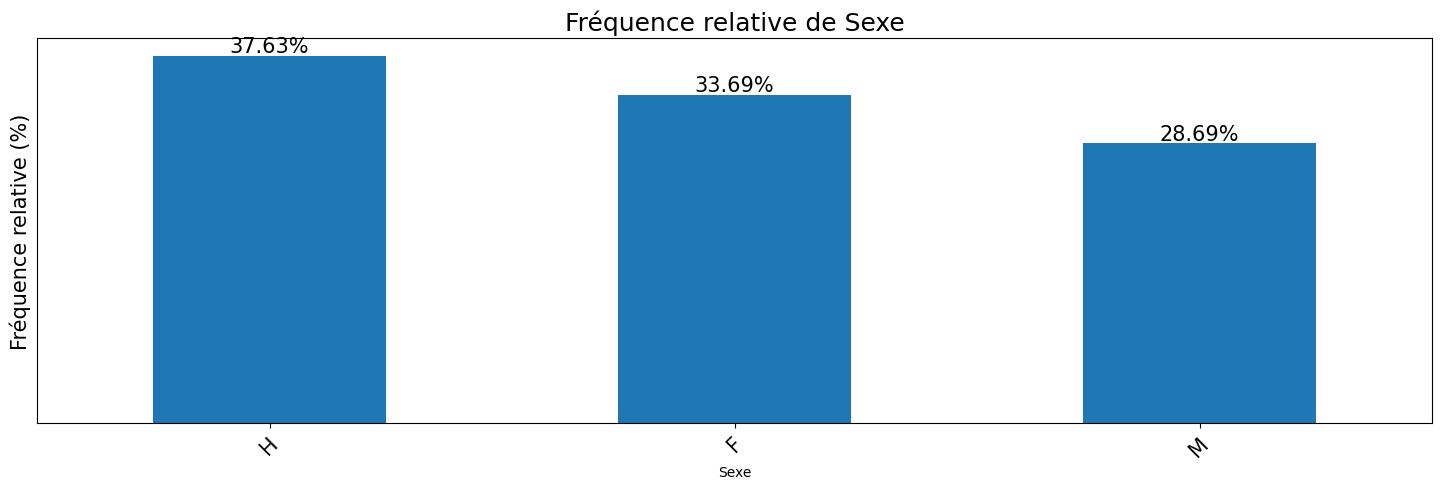

In [55]:
freq_absolue_et_relative(courses["Sexe"])

Fréquence absolue et relative de  cr-corde :


,Fréquence absolue,Fréquence relative(%)
cr-corde,,
corde à gauche,13350,67.19
corde à droite,6519,32.81


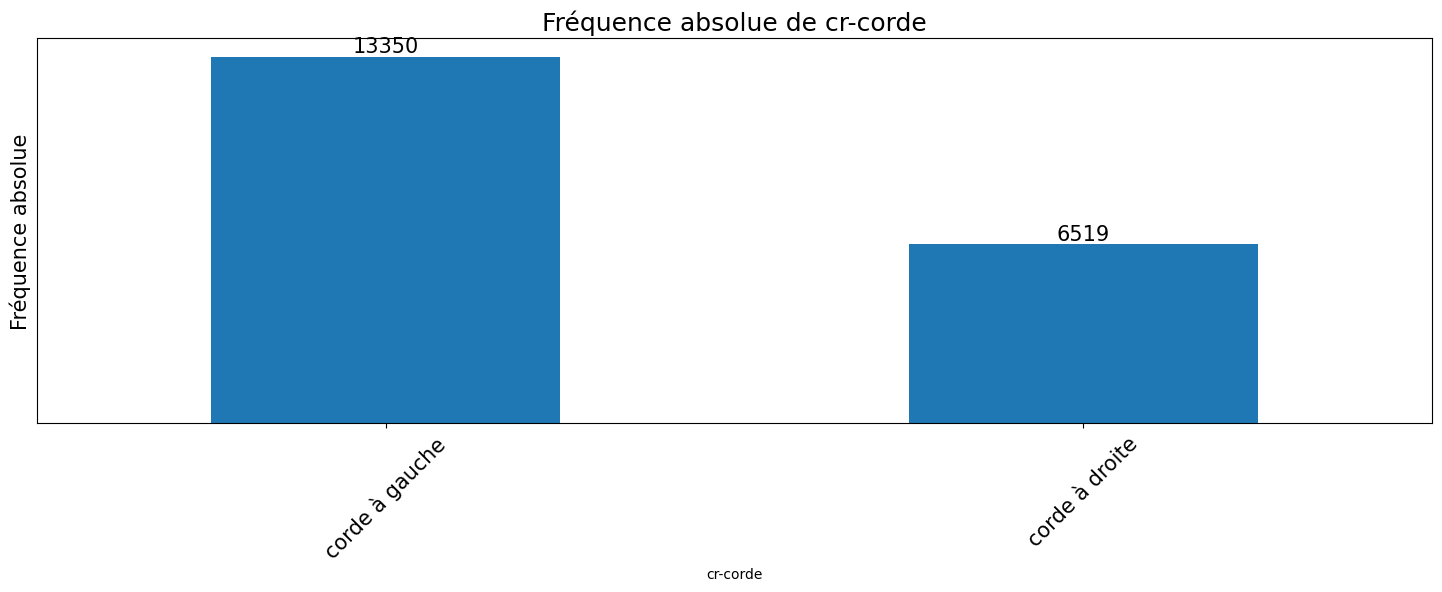

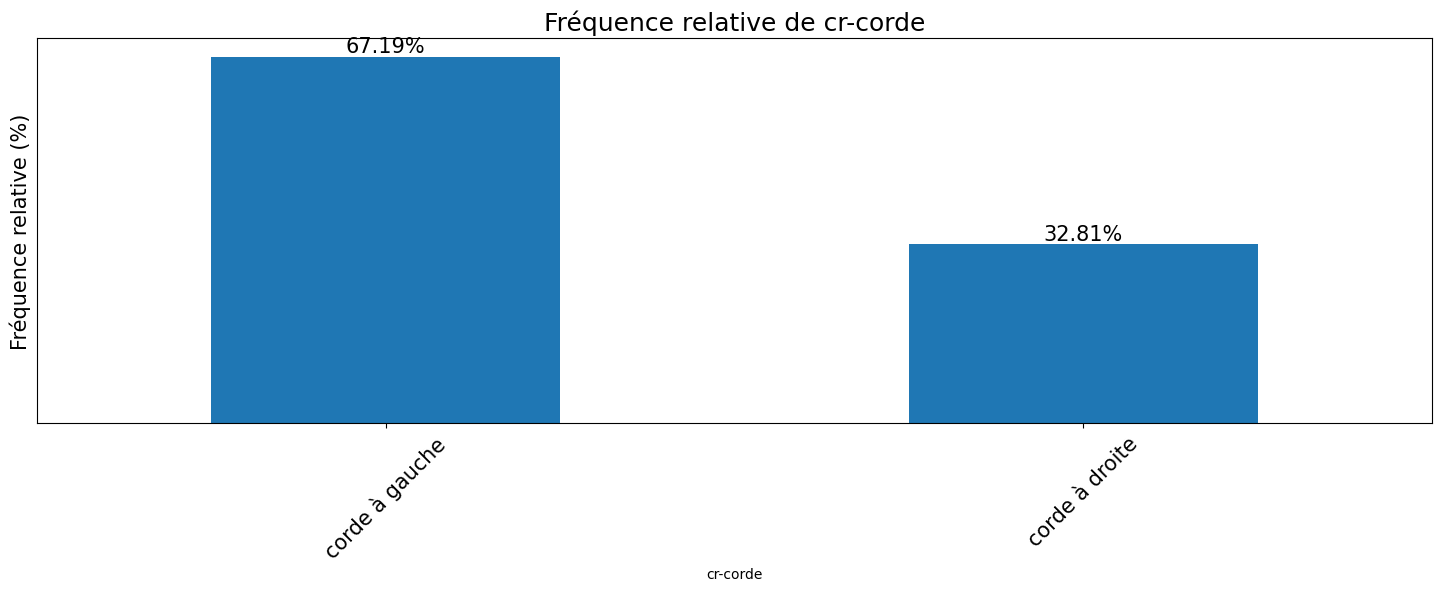

In [56]:
freq_absolue_et_relative(courses["cr-corde"])

In [48]:
# On va créer un DatafRame pour stocker les valeurs de chaque hippodrome
ar=courses['cr-Hippodrome'].value_counts(dropna=False)
dfhip = pd.DataFrame(ar)

print("Moyenne : ", dfhip['count'].mean())
print(" Mediane : ", dfhip['count'].median())

Moyenne :  127.36538461538461
 Mediane :  10.0


/tmp/ipykernel_2798/799549751.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfhip.loc[val][0]>127:


Fréquence absolue et relative de  cr-HippodromeCat :


,Fréquence absolue,Fréquence relative(%)
cr-HippodromeCat,,
Vincennes,3947,19.87
Autre,2505,12.61
Cagnes,1160,5.84
Enghien,1021,5.14
Mons,725,3.65
Avenches,683,3.44
Cabourg,635,3.20
Vichy,631,3.18
Caen,620,3.12


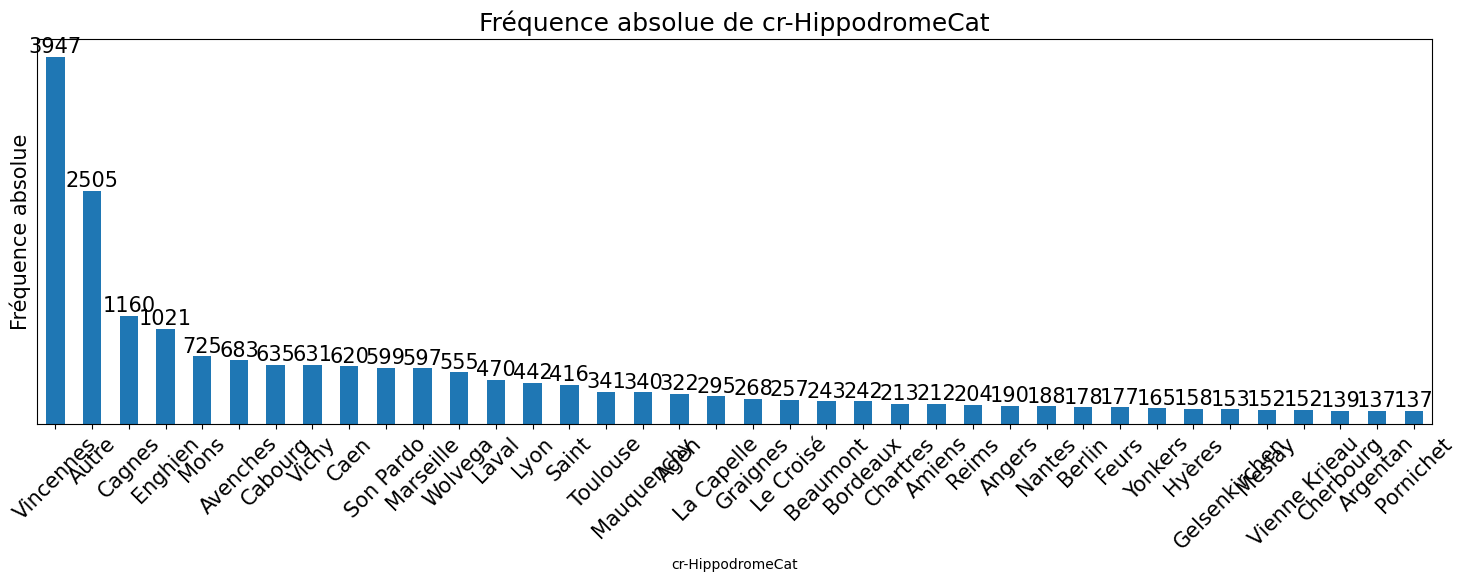

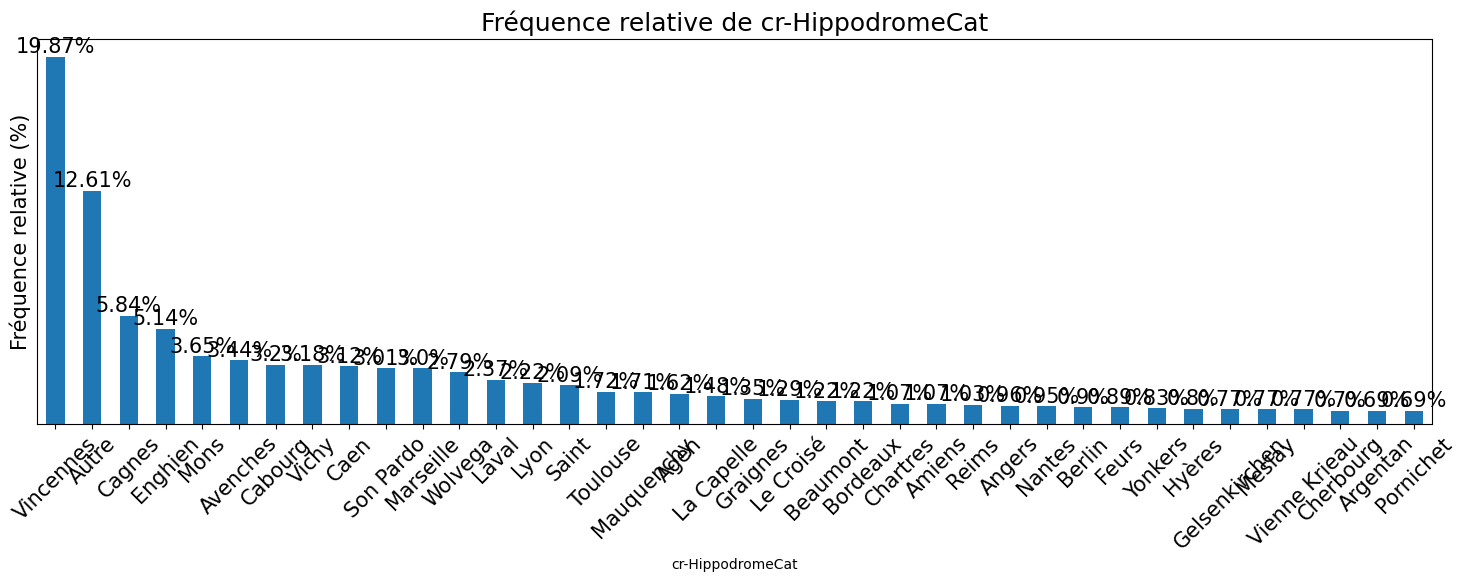

In [ ]:
def convert_hip(val):
    if dfhip.loc[val][0]>127:
        return val
    else:
        return "Autre"

courses['cr-HippodromeCat']=courses['cr-Hippodrome'].apply(convert_hip)

'''Nombre d'hippodromes différents '''
print("Nombre d'hippodromes différents : "+str(courses['cr-Hippodrome'].value_counts(dropna=False).count()))

'''Tracez et comptez à l'échelle absolue et relative la variable cr-HippodromeCat.'''
  
freq_absolue_et_relative(courses["cr-HippodromeCat"]);

Fréquence absolue et relative de  cr-distance :


,Fréquence absolue,Fréquence relative(%)
cr-distance,,
2.850 mètres,2521,12.69
2.700 mètres,2235,11.25
2.100 mètres,1484,7.47
2.150 mètres,1434,7.22
2.875 mètres,1161,5.84
...,...,...
3.350 mètres,1,0.01
1.810 mètres,1,0.01
1.680 mètres,1,0.01


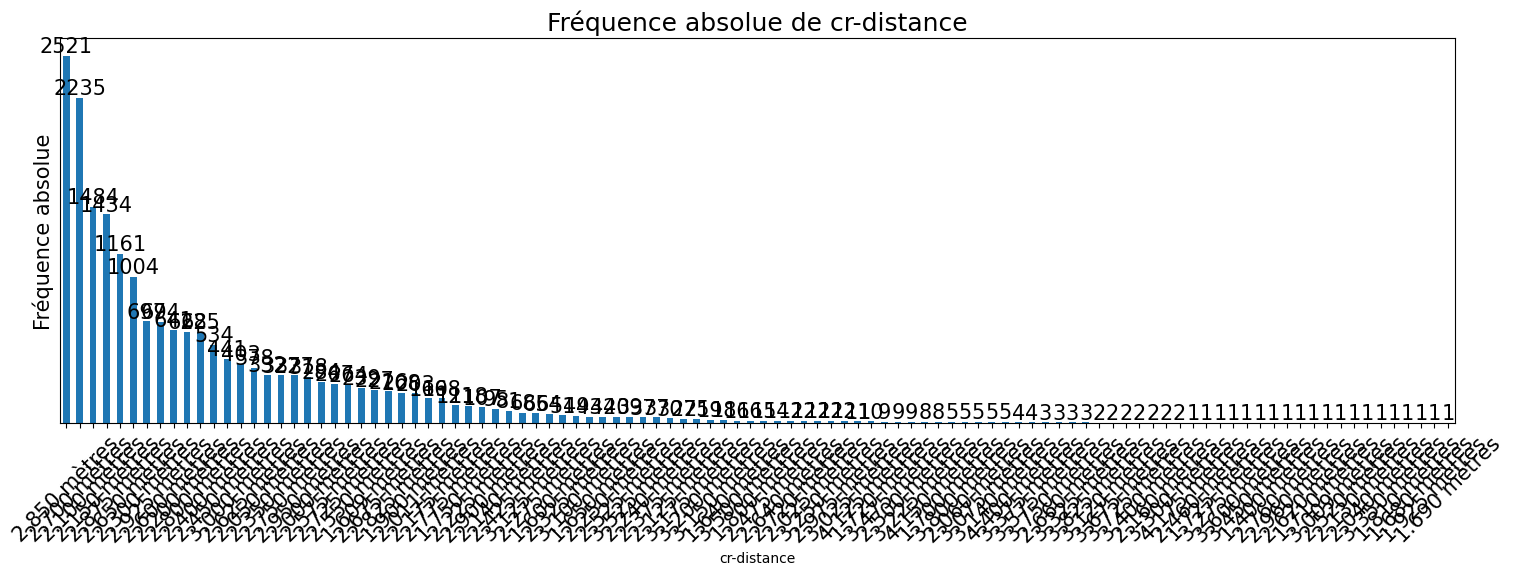

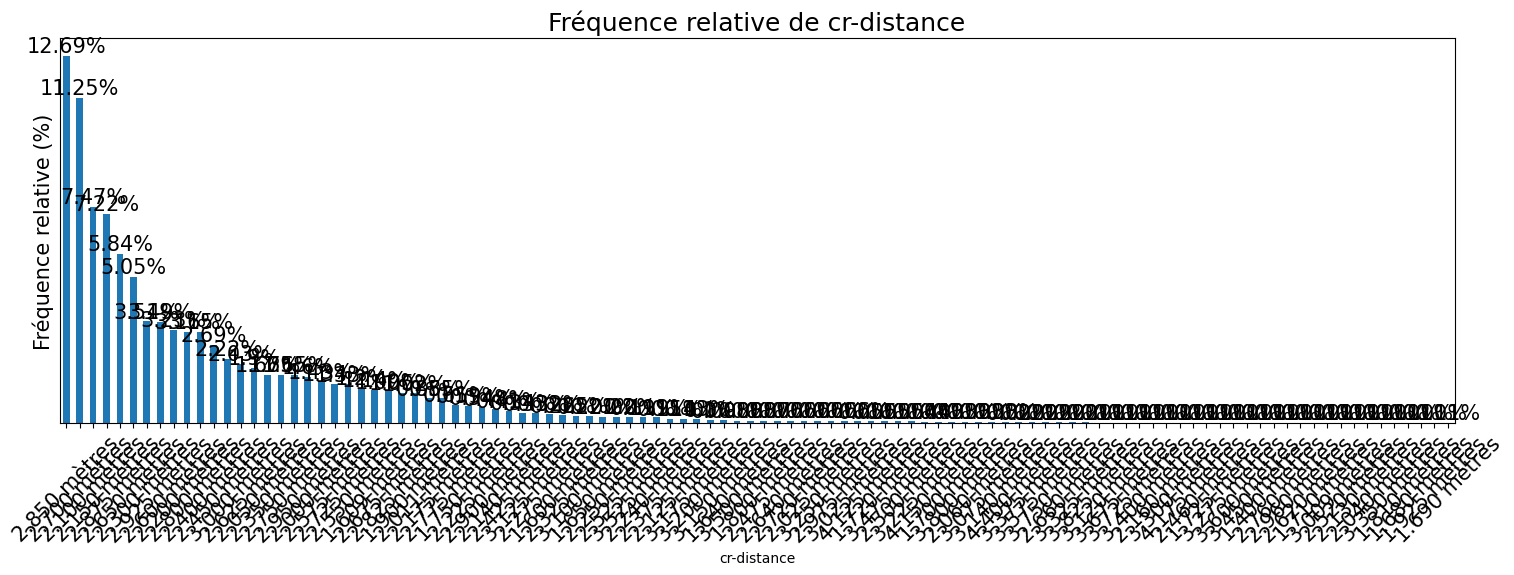

In [60]:
'''Tracez et comptez à l'échelle absolue et relative la variable cr-distance.'''
  
freq_absolue_et_relative(courses["cr-distance"])

In [61]:
def convert_distance(val):
    val=val.replace('mètres','')
    val=val.replace('.','')
    val=val.strip()
    return val


courses['cr-distanceNum']=courses['cr-distance'].apply(convert_distance)  
courses['cr-distanceNum']=pd.to_numeric(courses['cr-distanceNum'], downcast='integer')

In [62]:
courses['cr-corde'] = pd.Categorical(courses['cr-corde'])
courses['cr-etat du terrain'] = pd.Categorical(courses['cr-etat du terrain'])
courses['Sexe'] = pd.Categorical(courses['Sexe'])
courses['cr-reunion'] = pd.Categorical(courses['cr-reunion'])
courses['cr-num'] = pd.Categorical(courses['cr-num'])
courses["cr-Evt"] = pd.Categorical(courses["cr-Evt"])
courses["cr-autostart"] = pd.Categorical(courses["cr-autostart"])
courses['cr-HippodromeCat'] = pd.Categorical(courses['cr-HippodromeCat'])
courses['place'] = pd.Categorical(courses['place'])

In [63]:
courses.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cr-nb_partants,19869.0,13.897327,2.636189,4.0,12.0000,14.0000,16.0000,20.0
Numcheval,19869.0,7.757663,4.335501,1.0,4.0000,7.0000,11.0000,20.0
CoteProbable,19869.0,2.429463,3.007460,0.0,0.0000,2.0000,4.0000,70.0
NbRencontre,19869.0,0.465785,0.436451,0.0,0.0000,0.5000,1.0000,1.0
NbBattus,19869.0,0.490771,0.457191,0.0,0.0000,0.5000,1.0000,1.0
SommeNbRencontre,19869.0,0.492277,0.438670,0.0,0.0000,0.5000,1.0000,1.0
SommeNbBattus,19869.0,0.509566,0.456710,0.0,0.0000,0.5833,1.0000,1.0
NumCourseJockey,19869.0,0.436112,0.439037,0.0,0.0000,0.3333,1.0000,1.0
QteCourseJockeyJour,19869.0,0.500879,0.395626,0.0,0.0000,0.5000,1.0000,1.0
SumCote5Race,19869.0,0.830623,0.250740,0.0,0.7834,0.9344,1.0000,1.0


In [64]:
courses=courses.drop("SumPoids", axis=1)

In [ ]:
# def graph_unitaire(df,nom_colonne,proba):
#     f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
#     sns.kdeplot(df[nom_colonne],ax = ax1,color ='blue',fill=True,
#                 label=("Skewness : %.2f"%(df[nom_colonne].skew()),
#                        "Kurtosis: %.2f"%(df[nom_colonne].kurtosis())))
#     ax1.set_xlabel(nom_colonne,color='black',fontsize=12)
#     ax1.set_title(nom_colonne + ' Kdeplot',fontsize=14)
#     ax1.axvline(df[nom_colonne].mean() , color ='g',linestyle = '--')
#     ax1.legend(loc ='upper right',fontsize=12,ncol=2)
    
#     sns.histplot(df[nom_colonne] , fit=norm,ax = ax2);
#     ax2.set_xlabel(nom_colonne,color='black',fontsize=12)
#     ax2.set_title(nom_colonne + ' distribution',fontsize=14)
#     ax2.axvline(df[nom_colonne].mean() , color ='g',linestyle = '--')  
#     (mu, sigma) = norm.fit(df[nom_colonne])
#     ax2.legend(['Normal dist. ($\mu=$ {:.2f} et $\sigma=$ {:.2f} )'.format(mu, sigma)],loc ='upper right',fontsize=12,ncol=2)
    
#     sns.despine()
#     plt.show()
    
#     if proba==True:
#         graph_duo(df,nom_colonne)
        
#     return(df[nom_colonne].skew(),df[nom_colonne].kurtosis())

# def graph_duo(df,nom_colonne):
    
#     #Get also the QQ-plot
#     fig = plt.figure()
#     res = stats.probplot(courses[nom_colonne], plot=plt)
#     plt.show()


<>:16: SyntaxWarning:

invalid escape sequence '\m'

<>:16: SyntaxWarning:

invalid escape sequence '\m'

/tmp/ipykernel_2798/1600839608.py:16: SyntaxWarning:

invalid escape sequence '\m'



In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
#     "Lasso": Lasso(),
#     "Ridge": Ridge(),
#     "K-Neighbors Regressor": KNeighborsRegressor(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest Regressor": RandomForestRegressor(),
#     "XGBRegressor": XGBRegressor(), 
#     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
#     "AdaBoost Regressor": AdaBoostRegressor()
 }
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')